In [5]:
from scipy import integrate
import numpy as np

import betterplotlib as bpl
bpl.set_style()

In [22]:
def gaussian(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

def p_s0_given_s(s0, s, var_err):
    return gaussian(s0, s, var_err)

def p_s_given_predicted(s, s_pred, var_intrinsic):
    return gaussian(s, s_pred, var_intrinsic)

Do numerical integration over joint probability.

In [39]:
def true_p_s0_given_predicted(s0, s_pred, var_err, var_intrinsic):
    def joint_prob(s):
        return p_s0_given_s(s0, s, var_err) * p_s_given_predicted(s, s_pred, var_intrinsic)
    
    return integrate.quad(joint_prob, -np.inf, np.inf)[0]

In [40]:
def test_p_s0_given_predicted(s0, s_pred, var_err, var_intrinsic):
    return gaussian(s0, s_pred, var_err + var_intrinsic)

In [51]:
s_pred = 0.5
var_err = 0.05
var_int = 0.2

ss = np.arange(-10, 10, 0.1)
true_prob = [true_p_s0_given_predicted(s, s_pred, var_err, var_int) for s in ss]
test_prob = [test_p_s0_given_predicted(s, s_pred, var_err, var_int) for s in ss]

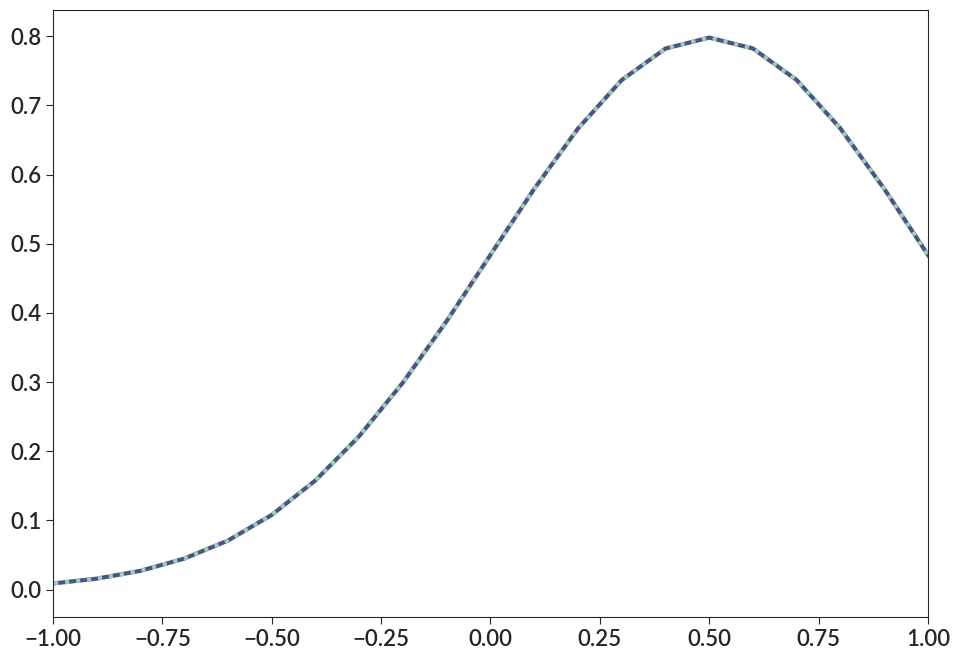

In [52]:
fig, ax = bpl.subplots()
ax.plot(ss, true_prob)
ax.plot(ss, test_prob, ls=":")
ax.set_limits(-1, 1)